In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the customer dataset
customer_data = pd.read_csv(r"C:\Users\Reena\Documents\Mall_Customers.csv")

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
customer_data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
customer_data.duplicated().sum()

0

In [12]:
customer_data.dropna()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
 #Define the mapping dictionary
mapping = {'Female': 1, 'Male': 0}

In [15]:
# Apply the mapping to the 'Genre' column
customer_data['Genre'] = customer_data['Genre'].map(mapping)

In [16]:
# Display the updated dataframe
print(customer_data)

     CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      0   19                  15                      39
1             2      0   21                  15                      81
2             3      1   20                  16                       6
3             4      1   23                  16                      77
4             5      1   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      1   35                 120                      79
196         197      1   45                 126                      28
197         198      0   32                 126                      74
198         199      0   32                 137                      18
199         200      0   30                 137                      83

[200 rows x 5 columns]


In [17]:
# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

In [18]:
# Convert the scaled data back to a DataFrame
scaled_customer_data = pd.DataFrame(scaled_data, columns=customer_data.columns)

In [19]:
# Save the preprocessed data to a new file (optional)
scaled_customer_data.to_csv('preprocessed_customer_dataset.csv', index=False)

In [20]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [21]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [22]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

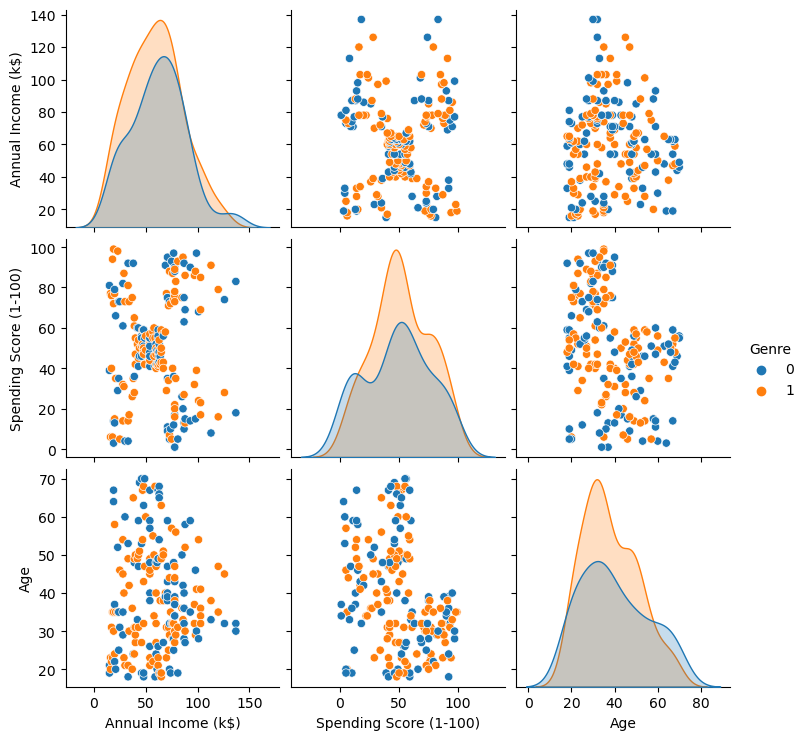

In [23]:
selected_columns=['Annual Income (k$)','Spending Score (1-100)','Age','Genre']
sns.pairplot(customer_data[selected_columns],hue='Genre')
plt.show()

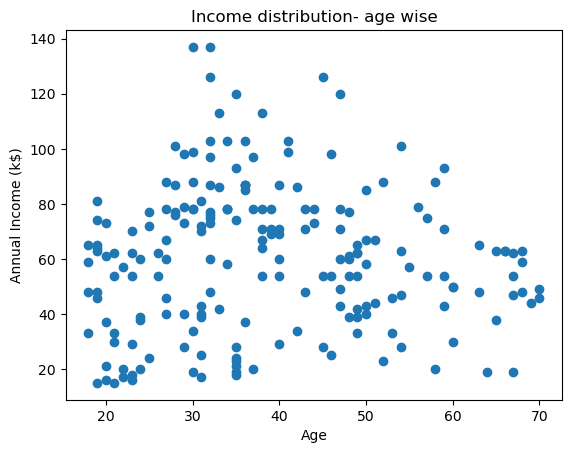

In [24]:
#scatter plot
plt.scatter(customer_data['Age'],customer_data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Income distribution- age wise')
plt.show()

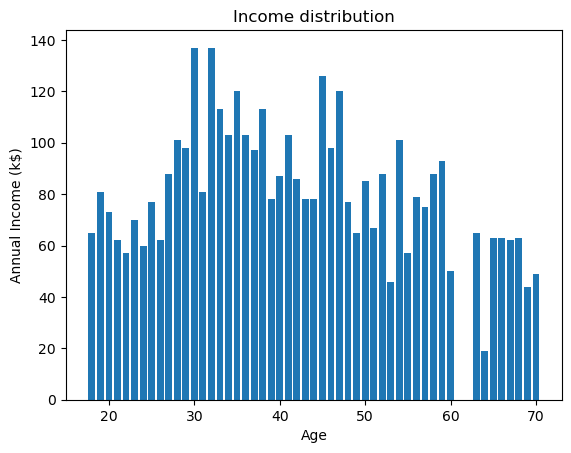

In [25]:
plt.bar(customer_data['Age'],customer_data['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Income distribution')
plt.show()

In [27]:
from sklearn.cluster import KMeans
X = customer_data.iloc[:,:].values
X

array([[  1,   0,  19,  15,  39],
       [  2,   0,  21,  15,  81],
       [  3,   1,  20,  16,   6],
       [  4,   1,  23,  16,  77],
       [  5,   1,  31,  17,  40],
       [  6,   1,  22,  17,  76],
       [  7,   1,  35,  18,   6],
       [  8,   1,  23,  18,  94],
       [  9,   0,  64,  19,   3],
       [ 10,   1,  30,  19,  72],
       [ 11,   0,  67,  19,  14],
       [ 12,   1,  35,  19,  99],
       [ 13,   1,  58,  20,  15],
       [ 14,   1,  24,  20,  77],
       [ 15,   0,  37,  20,  13],
       [ 16,   0,  22,  20,  79],
       [ 17,   1,  35,  21,  35],
       [ 18,   0,  20,  21,  66],
       [ 19,   0,  52,  23,  29],
       [ 20,   1,  35,  23,  98],
       [ 21,   0,  35,  24,  35],
       [ 22,   0,  25,  24,  73],
       [ 23,   1,  46,  25,   5],
       [ 24,   0,  31,  25,  73],
       [ 25,   1,  54,  28,  14],
       [ 26,   0,  29,  28,  82],
       [ 27,   1,  45,  28,  32],
       [ 28,   0,  35,  28,  61],
       [ 29,   1,  40,  29,  31],
       [ 30,  

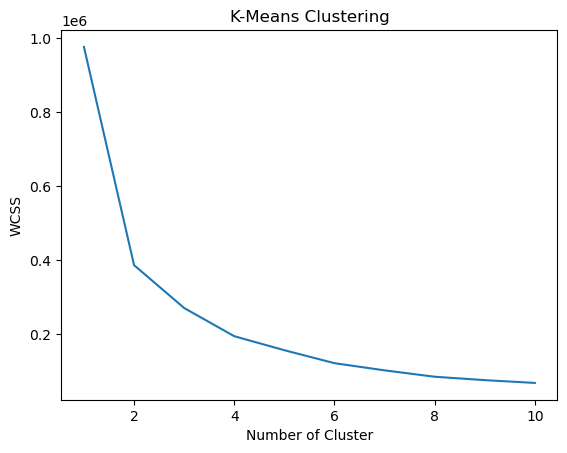

In [28]:
wcss = [] # empty list
for index in range(1,11): # range 1 to 10 implies that between this range any no. of clusters can be formed
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("K-Means Clustering")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

In [29]:
customer_data.head

<bound method NDFrame.head of      CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1      0   19                  15                      39
1             2      0   21                  15                      81
2             3      1   20                  16                       6
3             4      1   23                  16                      77
4             5      1   31                  17                      40
..          ...    ...  ...                 ...                     ...
195         196      1   35                 120                      79
196         197      1   45                 126                      28
197         198      0   32                 126                      74
198         199      0   32                 137                      18
199         200      0   30                 137                      83

[200 rows x 5 columns]>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

col=['Annual Income (k$)','Spending Score (1-100)']
X=customer_data[col]

# Get the cluster labels
cluster_labels = kmeans.labels_
#choose the number of clusters
k=3

kmeans=KMeans(n_clusters=k)
kmeans

kmeans.fit(X)

#obtain the cluster label
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
customer_data['cluster'] = labels

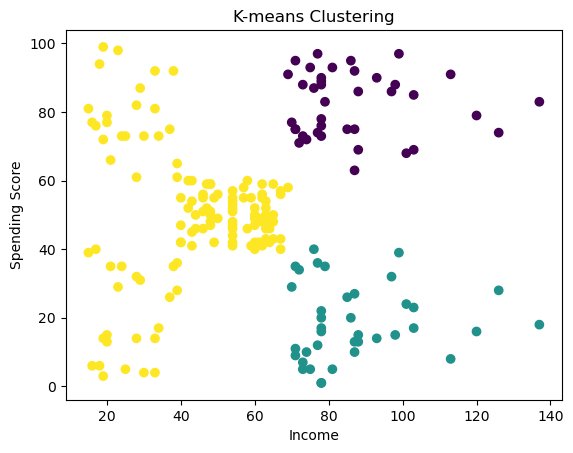

In [31]:
#visualize the model 
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c= customer_data['cluster'], cmap ='viridis')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=42)
cluster_values = kmeans.fit_predict(X)
print(cluster_values)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [33]:
cluster_values.shape

(200,)

In [34]:
customer_data['Target'] = cluster_values
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster,Target
0,1,0,19,15,39,2,2
1,2,0,21,15,81,2,3
2,3,1,20,16,6,2,2
3,4,1,23,16,77,2,3
4,5,1,31,17,40,2,2


In [35]:
from sklearn.metrics import silhouette_score

# Assuming your DataFrame is called 'df' and the cluster labels are in the 'cluster' column
X =customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]
labels = customer_data['cluster']

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)

print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.46761358158775435


In [36]:
customer_data.Target.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Target, dtype: int64

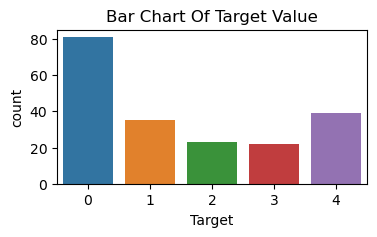

In [37]:
plt.figure(figsize=(4,2))
sns.countplot(x=customer_data.Target)
plt.title("Bar Chart Of Target Value")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
# Split the data into features and target variable
X = customer_data.drop('Target', axis=1)
y =customer_data['Target']
X

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2
...,...,...,...,...,...,...
195,196,1,35,120,79,0
196,197,1,45,126,28,1
197,198,0,32,126,74,0
198,199,0,32,137,18,1


In [39]:
y

0      2
1      3
2      2
3      3
4      2
      ..
195    4
196    1
197    4
198    1
199    4
Name: Target, Length: 200, dtype: int32

In [40]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# from sklearn.preprocessing import StandardScaler

# # Create StandardScaler object and apply fit_transform on training data

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train.values)

# # Apply transform on testing data using the already trained scaler

# X_test = scaler.transform(X_test)

In [41]:
# Train and test a decision tree classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train.values, y_train)
y_pred_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
cr_dtc = classification_report(y_test, y_pred_dtc)

In [42]:
# Train and test a k-nearest neighbors classifier

knn = KNeighborsClassifier()
knn.fit(X_train.values, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)

In [43]:
# Train and test a Gaussian Naive Bayes classifier

gnb = GaussianNB()
gnb.fit(X_train.values, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cr_gnb = classification_report(y_test, y_pred_gnb)

In [44]:
# Train and test a support vector machine classifier

svc = SVC()
svc.fit(X_train.values, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cr_svc = classification_report(y_test, y_pred_svc)

In [45]:
print("Decision Tree Accuracy:", accuracy_dtc)
print("KNN Accuracy:", accuracy_knn)
print("Gaussian NB Accuracy:", accuracy_gnb) 
print("SVM Accuracy:", accuracy_svc)

Decision Tree Accuracy: 0.95
KNN Accuracy: 0.95
Gaussian NB Accuracy: 0.9
SVM Accuracy: 0.95


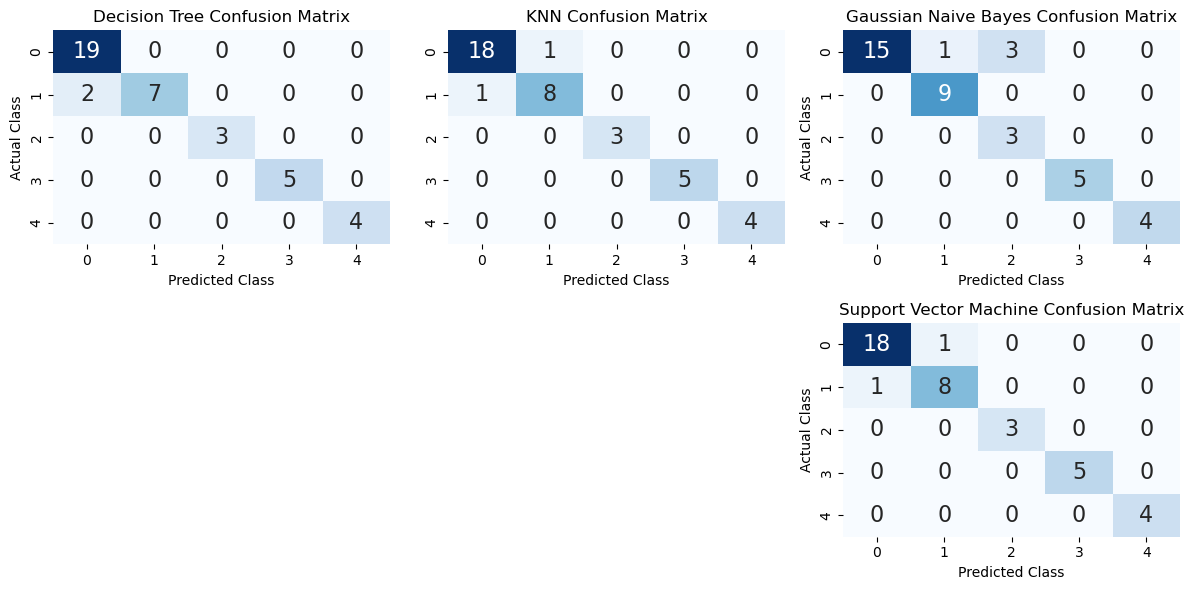

In [46]:
# Plot the confusion matrices for each classifier

plt.figure(figsize=(12, 6))
plt.subplot(231)
sns.heatmap(cm_dtc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(232)
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Class")

plt.subplot(2, 3, 3)
sns.heatmap(cm_gnb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.subplot(2, 3, 6)
sns.heatmap(cm_svc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 16})
plt.title("Support Vector Machine Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.tight_layout()
plt.show()

In [47]:
print("Decision Tree Classifier:\n", cr_dtc)
print("KNN Classifier:\n", cr_knn)
print("Gaussian Naive Bayes Classifier:\n", cr_gnb) 
print("Support Vector Machine Classifier:\n", cr_svc)

Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4

    accuracy                           0.95        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.95      0.95      0.95        40

KNN Classifier:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.89      0.89      0.89         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         4

    accuracy                           0.95        40
   macro avg       0.97      0.97      0.97        40
weighted avg       0.95      0.95

In [48]:
customer_data.head

<bound method NDFrame.head of      CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1      0   19                  15                      39   
1             2      0   21                  15                      81   
2             3      1   20                  16                       6   
3             4      1   23                  16                      77   
4             5      1   31                  17                      40   
..          ...    ...  ...                 ...                     ...   
195         196      1   35                 120                      79   
196         197      1   45                 126                      28   
197         198      0   32                 126                      74   
198         199      0   32                 137                      18   
199         200      0   30                 137                      83   

     cluster  Target  
0          2       2  
1          2       3  


In [49]:
print("Decision Tree Accuracy:", accuracy_dtc)
print("KNN Accuracy:", accuracy_knn)
print("Gaussian NB Accuracy:", accuracy_gnb) 
print("SVM Accuracy:", accuracy_svc)

Decision Tree Accuracy: 0.95
KNN Accuracy: 0.95
Gaussian NB Accuracy: 0.9
SVM Accuracy: 0.95
